In [ ]:
# https://github.com/jeffmcm1977/CMBAnalysis_SummerSchool/blob/master/CMB_School_Part_01.ipynb

In [3]:
import numpy as np
import matplotlib
import sys
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import astropy.io.fits as fits

## ipython notebook magic word to plot in the notebook
%matplotlib inline

## ipython notebook magic word to change the base directory
#%cd /Your/location/to/the/data

In [4]:
# read in the input CMB spectra
# ell, DlTT = np.loadtxt("CAMB_fiducial_cosmo_scalCls.dat", usecols=(0, 1), unpack=True)
ell, DlTT = np.loadtxt("./data_in/CAMB_fiducial_cosmo_scalCls.dat", usecols=(0, 1), unpack=True)

In [7]:
print(type(ell), ell.shape)
print(type(DlTT), DlTT.shape)

<class 'numpy.ndarray'> (4999,)
<class 'numpy.ndarray'> (4999,)


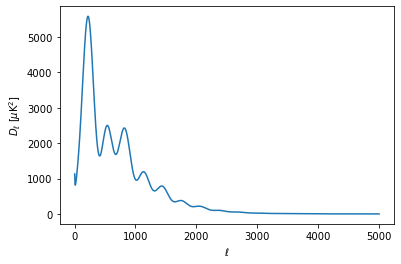

In [8]:
plt.plot(ell,DlTT)
plt.ylabel('$D_{\ell}$ [$\mu$K$^2$]')
plt.xlabel('$\ell$')
plt.show()

In [9]:
## variables to set up the size of the map
N = 2**10  # this is the number of pixels in a linear dimension
            ## since we are using lots of FFTs this should be a factor of 2^N
pix_size  = 0.5 # size of a pixel in arcminutes

## variables to set up the map plots
c_min = -400  # minimum for color bar
c_max = 400   # maximum for color bar
X_width = N*pix_size/60.  # horizontal map width in degrees
Y_width = N*pix_size/60.  # vertical map width in degrees

In [10]:
def make_CMB_T_map(N,pix_size,ell,DlTT):
    "makes a realization of a simulated CMB sky map given an input DlTT as a function of ell," 
    "the pixel size (pix_size) required and the number N of pixels in the linear dimension."
    #np.random.seed(100)
    # convert Dl to Cl
    ClTT = DlTT * 2 * np.pi / (ell*(ell+1.))
    ClTT[0] = 0. # set the monopole and the dipole of the Cl spectrum to zero
    ClTT[1] = 0.

    # make a 2D real space coordinate system
    onesvec = np.ones(N)
    inds  = (np.arange(N)+.5 - N/2.) /(N-1.) # create an array of size N between -0.5 and +0.5
    # compute the outer product matrix: X[i, j] = onesvec[i] * inds[j] for i,j 
    # in range(N), which is just N rows copies of inds - for the x dimension
    X = np.outer(onesvec,inds) 
    # compute the transpose for the y dimension
    Y = np.transpose(X)
    # radial component R
    R = np.sqrt(X**2. + Y**2.)
    
    # now make a 2D CMB power spectrum
    pix_to_rad = (pix_size/60. * np.pi/180.) # going from pix_size in arcmins to degrees and then degrees to radians
    ell_scale_factor = 2. * np.pi /pix_to_rad  # now relating the angular size in radians to multipoles
    ell2d = R * ell_scale_factor # making a fourier space analogue to the real space R vector
    ClTT_expanded = np.zeros(int(ell2d.max())+1) 
    # making an expanded Cl spectrum (of zeros) that goes all the way to the size of the 2D ell vector
    ClTT_expanded[0:(ClTT.size)] = ClTT # fill in the Cls until the max of the ClTT vector

    # the 2D Cl spectrum is defined on the multiple vector set by the pixel scale
    CLTT2d = ClTT_expanded[ell2d.astype(int)] 
    #plt.imshow(np.log(CLTT2d))
        
    
    # now make a realization of the CMB with the given power spectrum in real space
    random_array_for_T = np.random.normal(0,1,(N,N))
    FT_random_array_for_T = np.fft.fft2(random_array_for_T)   # take FFT since we are in Fourier space 
    
    FT_2d = np.sqrt(CLTT2d) * FT_random_array_for_T # we take the sqrt since the power spectrum is T^2
    plt.imshow(np.real(FT_2d))
        
    
    ## make a plot of the 2D cmb simulated map in Fourier space, note the x and y axis labels need to be fixed
    #Plot_CMB_Map(np.real(np.conj(FT_2d)*FT_2d*ell2d * (ell2d+1)/2/np.pi),0,np.max(np.conj(FT_2d)*FT_2d*ell2d * (ell2d+1)/2/np.pi),ell2d.max(),ell2d.max())  ###
    
    # move back from ell space to real space
    CMB_T = np.fft.ifft2(np.fft.fftshift(FT_2d)) 
    # move back to pixel space for the map
    CMB_T = CMB_T/(pix_size /60.* np.pi/180.)
    # we only want to plot the real component
    CMB_T = np.real(CMB_T)

    ## return the map
    return(CMB_T)
  ###############################

In [12]:
def Plot_CMB_Map(Map_to_Plot,c_min,c_max,X_width,Y_width, img_name):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    print("map mean:",np.mean(Map_to_Plot),"map rms:",np.std(Map_to_Plot))
    plt.gcf().set_size_inches(10, 10)
    im = plt.imshow(Map_to_Plot, interpolation='bilinear', origin='lower',cmap=cm.RdBu_r)
    im.set_clim(c_min,c_max)
    
    #ax=plt.gca()
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)

    #cbar = plt.colorbar(im, cax=cax)
    ##cbar = plt.colorbar()
    #im.set_extent([0,X_width,0,Y_width])
    #plt.ylabel('angle $[^\circ]$')
    #plt.xlabel('angle $[^\circ]$')
    #cbar.set_label('tempearture [uK]', rotation=270)
    
    #plt.show()
    
    #plt.savefig('cmb1.png')
    # plt.savefig('cmb3.png')
    plt.savefig('data_out_1/' + img_name)
    
    return(0)
  ###############################

map mean: -4.27334861422816 map rms: 105.9469416295126
map mean: -28.740369588019174 map rms: 102.51570985573503
map mean: -7.458797660503881 map rms: 103.74543760215289
map mean: -35.666790552990854 map rms: 105.5484729605934
map mean: -11.395785092153963 map rms: 101.98854789415658
map mean: -15.998492092410443 map rms: 94.59261759946838
map mean: 1.140539839154508 map rms: 92.81852680847987
map mean: 5.96619337158741 map rms: 98.29578118067164
map mean: 10.955277164192413 map rms: 102.34421837045323
map mean: -4.460370349254026 map rms: 101.75455471145496


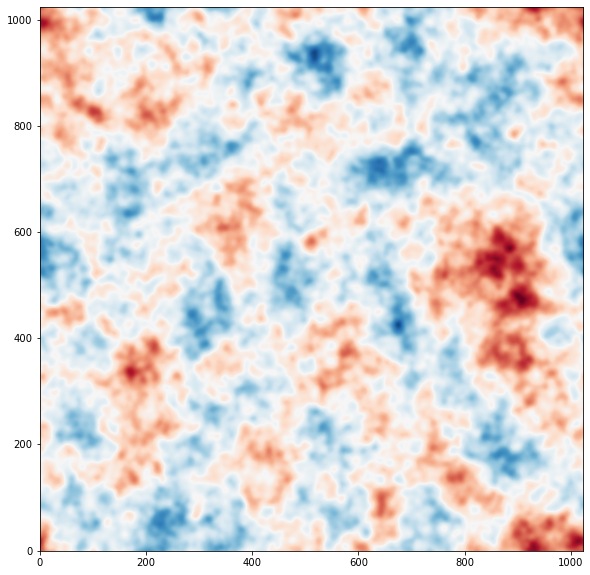

In [13]:
for i in range(0,10):
    CMB_T = make_CMB_T_map(N,pix_size,ell,DlTT)
    img_name = []
    img_name = 'cmb_' + str(i) + '.png'
    Plot_CMB_Map(CMB_T,c_min,c_max,X_width,Y_width, img_name)

In [ ]:
## make a CMB T map
CMB_T = make_CMB_T_map(N,pix_size,ell,DlTT)
Plot_CMB_Map(CMB_T,c_min,c_max,X_width,Y_width)
#plt.savefig('cmb1.png')
#plt.clf()

In [ ]:
type(CMB_T)

In [ ]:
CMB_T.shape

In [ ]:
CMB_T[0].shape

In [ ]:
print(np.mean(CMB_T))
print(np.std(CMB_T))

In [ ]:
print(np.max(CMB_T))
print(np.min(CMB_T))

In [ ]:
print(CMB_T[0][0])
print(CMB_T[1][1])

### Make list of cmb values

In [ ]:
CMB_T.shape[0]
CMB_T.shape[1]

In [ ]:
ls_cmb = []

for i in range(0,CMB_T.shape[0]):
    for j in range(0, CMB_T.shape[1]):
        #print(CMB_T[i][j])
        ls_cmb.append(CMB_T[i][j])

In [ ]:
len(ls_cmb)

In [ ]:
np.mean(ls_cmb)

In [ ]:
plt.figure()
plt.hist(ls_cmb, bins=500);